#  <center> Credit Default Analysis</center>
_Author: Michael Zaladonis_
## Predicting which customers will default

The purporse of this assignment to identify the model that most accurately predicts which borrowers are most likely to default on thier loan.

## Contents
1. [Introduction](#Introduction)
1. [Importing the Libraries](#Importing)
2. [Read the data](#Reading)
3. [Glimpse and Clean Data](#data_fomatting)
4. [Explore Data](#data_exploration)
  1. [Sex/Gender](#sex)
  2. [Age](#age)
  3. [Marriage](#MARRIAGE)
  4. [Education](#EDUCATION)
  5. [Default Status](#DEFAULTING)
  6. [History of past payment](#past)
  7. [Amount of bill statement](#bill)  
  8. [Amount of previous payment](#previous)
6. <del>[Model Building](#build)</del>
7. <del>[Feature Importance](#feature_importance)</del>
8. <del>[Model Evaluation](#evaluate)</del>
9. <del>[Saving Model](#save_model)</del>
10. <del>[Meassuring Accuracy](#meassure_acc)</del>
11. <del>[Getting User Input](#user_input)</del>
12. <del>[Prediction for User Input](#pred_user_input)</del>
13. [References](#References)



<a id="Introduction"></a>
#  Introduction
___
## Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


## Payment Index

- -2: No consumption; 
- -1: Paid in full; 
- 0: The use of revolving credit; 
- 1 = payment delay for 1 month; 
- 2 = payment delay for 2 months;
- 3 = payment delay for 3 months;
- 4 = payment delay for 4 months;
- 5 = payment delay for 5 months;
- 6 = payment delay for 6 months;
- 7 = payment delay for 7 months;
- 8 = payment delay for 8 months; 
- 9 = payment delay for 9 months and above.

<a id="Importing"></a>
# Import the Libraries
___

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools


<a id="Reading"></a>
# Read the data
___

In [2]:
credit = pd.read_csv('/Users/Michael/Documents/GitHub/C5T2/data/raw/credit.csv', header =1)

<a id="data_fomatting"></a>
# Glimpse and Clean Data
___

Check the decoration

In [3]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

We start by looking to the data features (first 5 rows).

In [4]:
credit.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Let's look into more details to the data.

In [5]:
credit.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
credit.describe().round(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,...,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,15000.5,167484.3,1.6,1.9,1.6,35.5,-0.0,-0.1,-0.2,-0.2,...,43262.9,40311.4,38871.8,5663.6,5921.2,5225.7,4826.1,4799.4,5215.5,0.2
std,8660.4,129747.7,0.5,0.8,0.5,9.2,1.1,1.2,1.2,1.2,...,64332.9,60797.2,59554.1,16563.3,23040.9,17607.0,15666.2,15278.3,17777.5,0.4
min,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,...,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,7500.8,50000.0,1.0,1.0,1.0,28.0,-1.0,-1.0,-1.0,-1.0,...,2326.8,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.5,117.8,0.0
50%,15000.5,140000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,19052.0,18104.5,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0,0.0
75%,22500.2,240000.0,2.0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,...,54506.0,50190.5,49198.2,5006.0,5000.0,4505.0,4013.2,4031.5,4000.0,0.0
max,30000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,...,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0


Lets look for missing Data.

In [7]:
credit.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

There is no missing data.

Next we will Look at payment history.

In [8]:
credit.iloc[:,6:12].describe().round(1)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,-0.0,-0.1,-0.2,-0.2,-0.3,-0.3
std,1.1,1.2,1.2,1.2,1.1,1.1
min,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,8.0,8.0,8.0,8.0,8.0,8.0


Each colum contains the same data, and we will explore one column.

In [9]:
credit["PAY_0"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [10]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

Bin the data into 6 age groups by decade.

In [11]:
bins = [20, 25, 35, 45, 55, 65, 100]

labels = ["20-25","25-35","35-45","45-55","55-65",">60"]
credit['AGE_BINNED'] = pd.cut(credit['AGE'], bins=bins, labels=labels)


Bin the data into 6 age groups by decade.

In [12]:
bins = [10000,25000,50000,100000,1000000]

labels = ["10-25","25-50","50-100", ">100"]
credit['LIMIT_BAL_BINNED'] = pd.cut(credit['LIMIT_BAL'], bins=bins, labels=labels)

print(credit['LIMIT_BAL_BINNED'].head())



0     10-25
1      >100
2    50-100
3     25-50
4     25-50
Name: LIMIT_BAL_BINNED, dtype: category
Categories (4, object): [10-25 < 25-50 < 50-100 < >100]



Recode the last column for ease of use. 


In [13]:
credit["DEFAULTING"] = credit["default payment next month"]


Convert all of categorical feartures from thier current datatype to categorical data. This will allow us to explorer the data a bit better.


In [14]:
col_names = ["SEX","EDUCATION","MARRIAGE", "DEFAULTING", "AGE_BINNED", "LIMIT_BAL_BINNED"]

# loop to change each column to category type
for col in col_names:
    credit[col + "_cat"] = credit[col].astype('category',copy=True)

cat_dytpes = credit.select_dtypes(exclude=["number","bool_","object_"])

print(cat_dytpes.dtypes)
 

AGE_BINNED              category
LIMIT_BAL_BINNED        category
SEX_cat                 category
EDUCATION_cat           category
MARRIAGE_cat            category
DEFAULTING_cat          category
AGE_BINNED_cat          category
LIMIT_BAL_BINNED_cat    category
dtype: object


<a id="data_exploration"></a>
# Explore Data
___

In [15]:
# Column Names
header = credit.dtypes.index
print(header)


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'AGE_BINNED', 'LIMIT_BAL_BINNED',
       'DEFAULTING', 'SEX_cat', 'EDUCATION_cat', 'MARRIAGE_cat',
       'DEFAULTING_cat', 'AGE_BINNED_cat', 'LIMIT_BAL_BINNED_cat'],
      dtype='object')


In [16]:
credit.groupby(['DEFAULTING']).sum()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
DEFAULTING,,,,,,,,,,,,,,,,,,,,,
0,351976183,4161122000,37713,43021,36416,827489,-4935,-7054,-7389,-8309,...,1018931265,946953325,912183566,147364630,155147826,134424700,123841567,122619419,133627402,0
1,98038817,863407680,10399,12573,10140,237076,4434,3041,2403,1689,...,278957204,262388704,253969246,22542785,22487079,22345745,20940739,21362210,22837675,6636


In [17]:
ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")

# Function for displaying categorical data
def plot_categorical(data, col, xlabel_angle=0, title=''):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts()
    ax.set_facecolor("white")
    plt.figure(figsize=(20,14))
    sns.barplot(x = plotdata.index, y=plotdata.values)
    plt.title(col)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    plt.show()
    
    
# Function for displaying numercial data   
def plot_numerical(data, col, bins=50):
    '''use this for ploting the distribution of numercial features'''
    ax.set_facecolor("white")
    plt.figure(figsize=(20,14))

    pp = sns.distplot(data[col].dropna(), kde=True,bins=bins)
    plt.title("Distribution of %s" % col)
    plt.show()
    

def plotCat2(col):
    ax = plt.figure(figsize=(20,14))
    ax.set_facecolor("white")
    plt.subplot(121)
    pp = credit[credit["DEFAULTING"] == 1][col].value_counts().plot.pie(autopct = "%1.0f%%",startangle = 60,shadow =True).axis('equal')
    plt.title("Distribution of Default by %s" % col)

    plt.subplot(122)
    ax = credit[credit["DEFAULTING"] == 1][col].value_counts().plot(kind="barh")
    for i,j in enumerate(credit["DEFAULTING"].value_counts().values):
        ax.text(.7,i,j,fontsize=20)

    plt.title("Distribution of %s" % col)
    plt.show()


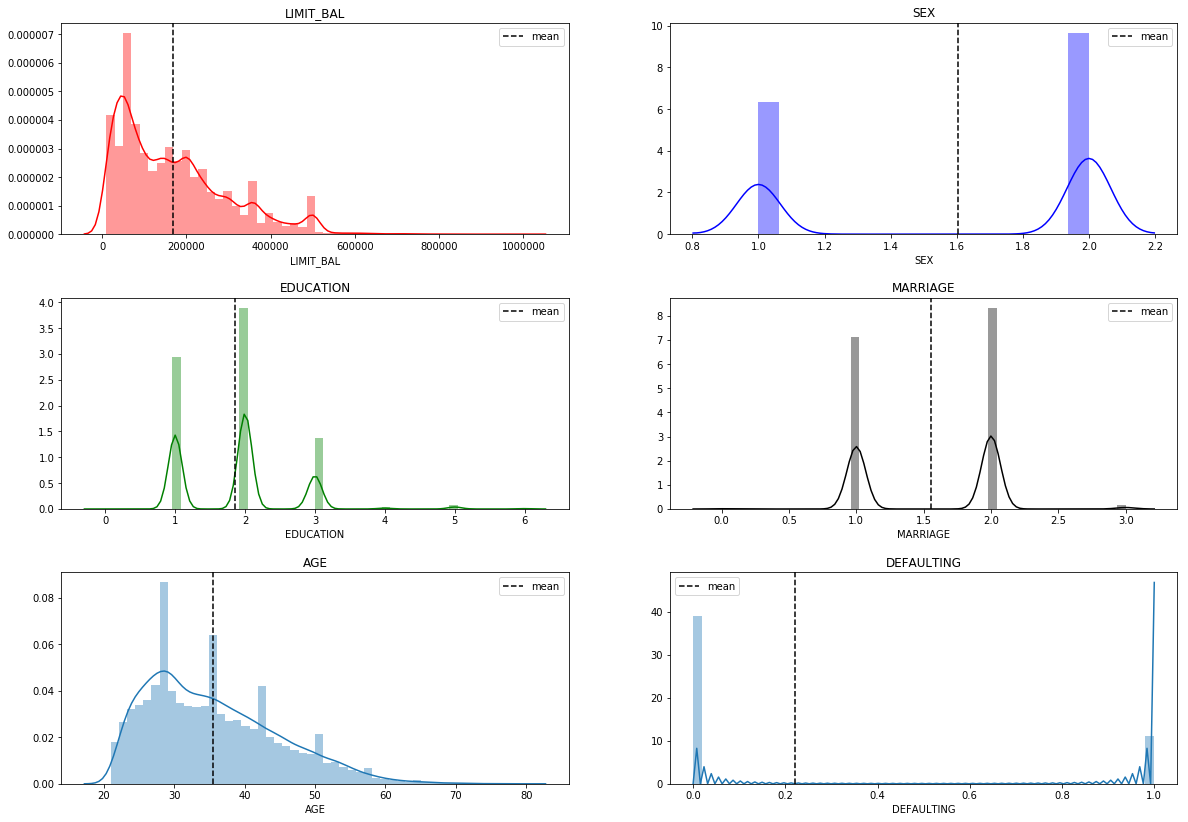

In [18]:
cols = [ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', "DEFAULTING"]
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")
for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,2,j+1)
    sns.distplot(credit[credit[i].notnull()][i],color=k)
    plt.axvline(credit[i].mean(),label = "mean",linestyle="dashed",color="k")
    plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .3)

Look at the Breakdown of people who are defaulting on thier loan. 

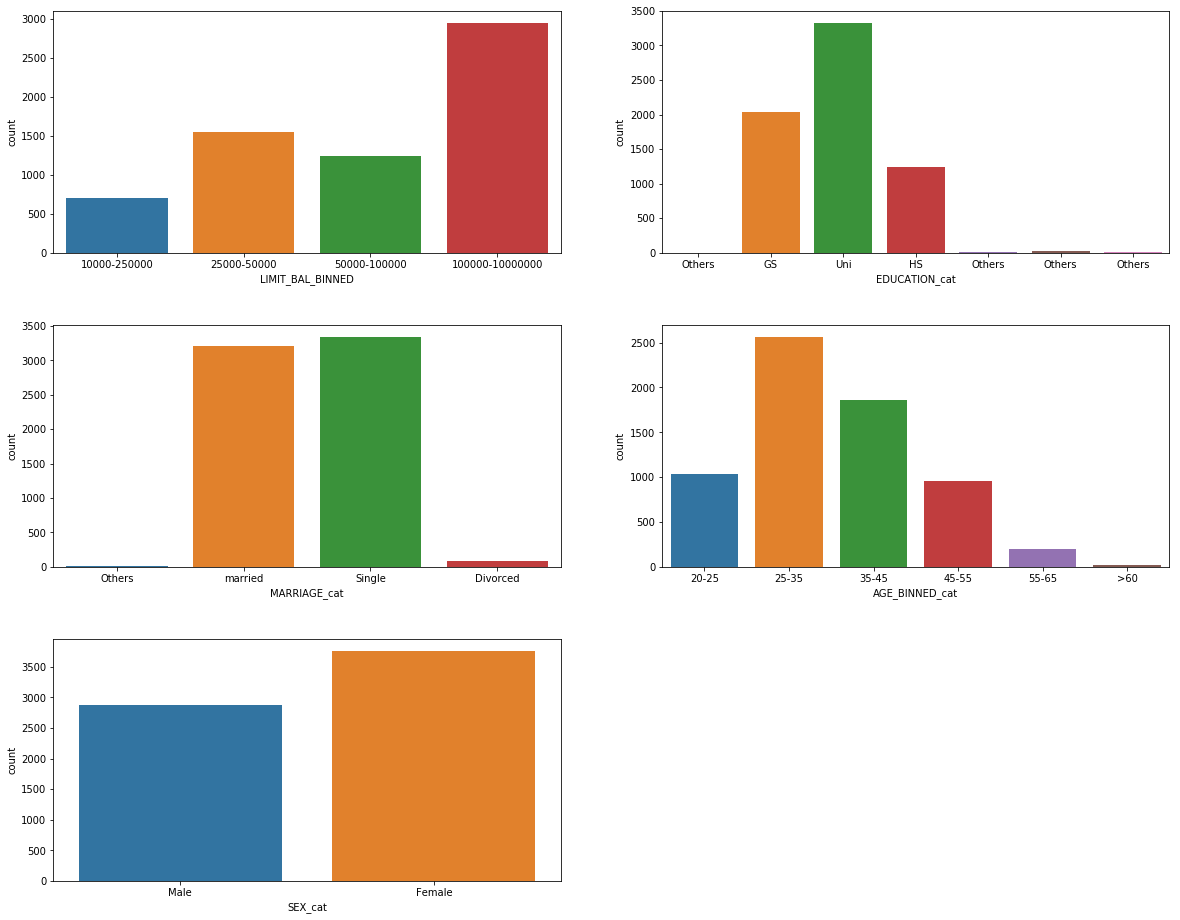

In [19]:
colsx = [ "LIMIT_BAL_BINNED", 'EDUCATION_cat','MARRIAGE_cat', 'AGE_BINNED_cat', 'SEX_cat']
length = len(colsx)
cs = ["r","b","g","k"]


ax = plt.figure(figsize=(20,16))
ax.set_facecolor("white")

labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["Others", "GS", "Uni", "HS","Others","Others","Others" ],["Others", "married","Single", "Divorced"],["20-25","25-35","35-45","45-55","55-65",">60"], ["Male","Female"]
]


x = credit.loc[credit['DEFAULTING'] == 1]


for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(3,2,j+1)
    pp = sns.countplot(x=i , data=x);
    pp.set_xticklabels(labels[j])
#     lgnd = pp.legend(['Defaulting'])
#     plt.legend(loc="best")
    plt.subplots_adjust(hspace = .3)
plt.show()


<a id="Balance"></a>
## Limit Balance

In [20]:
credit.groupby(['LIMIT_BAL_BINNED'])["DEFAULTING"].sum()

LIMIT_BAL_BINNED
10-25      698
25-50     1545
50-100    1244
>100      2952
Name: DEFAULTING, dtype: int64

In [21]:
credit.LIMIT_BAL.unique()

array([  20000,  120000,   90000,   50000,  500000,  100000,  140000,
        200000,  260000,  630000,   70000,  250000,  320000,  360000,
        180000,  130000,  450000,   60000,  230000,  160000,  280000,
         10000,   40000,  210000,  150000,  380000,  310000,  400000,
         80000,  290000,  340000,  300000,   30000,  240000,  470000,
        480000,  350000,  330000,  110000,  420000,  170000,  370000,
        270000,  220000,  190000,  510000,  460000,  440000,  410000,
        490000,  390000,  580000,  600000,  620000,  610000,  700000,
        670000,  680000,  430000,  550000,  540000, 1000000,  530000,
        710000,  560000,  520000,  750000,  640000,   16000,  570000,
        590000,  660000,  720000,  327680,  740000,  800000,  760000,
        690000,  650000,  780000,  730000])

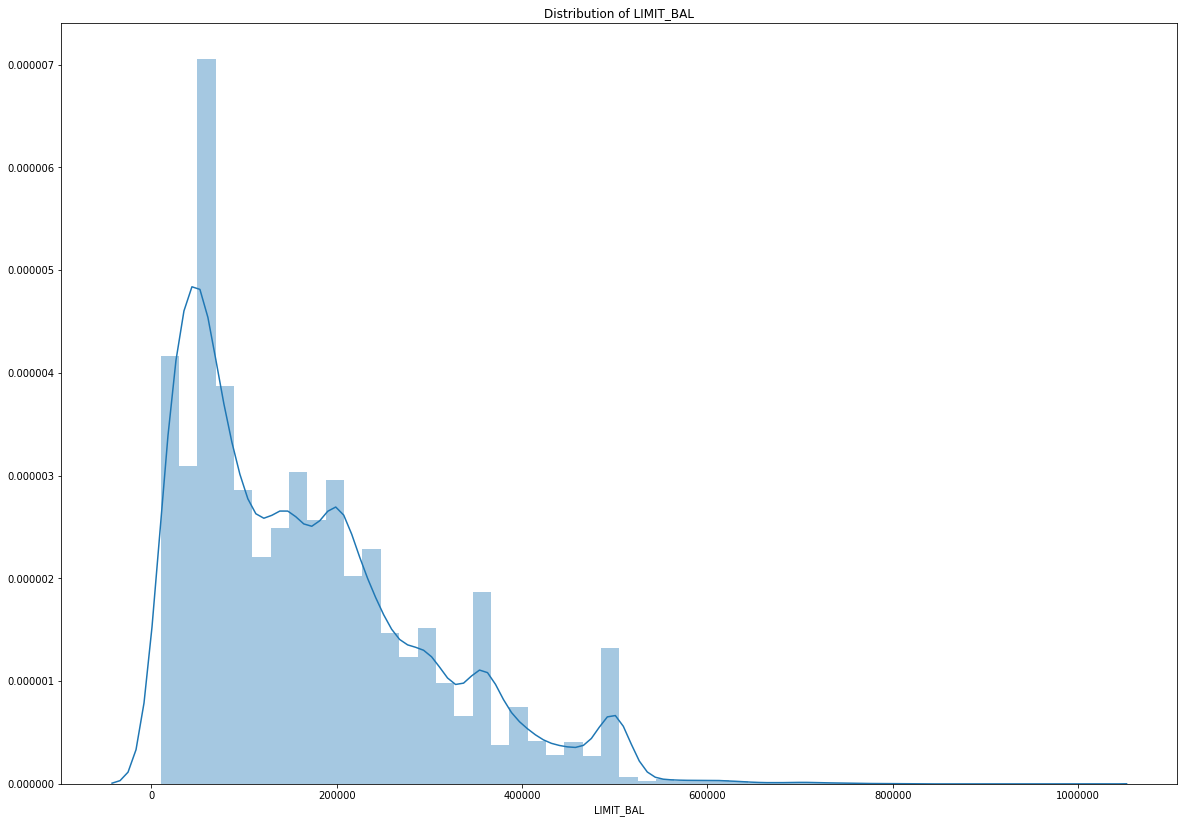

In [22]:
plot_numerical(credit, 'LIMIT_BAL')

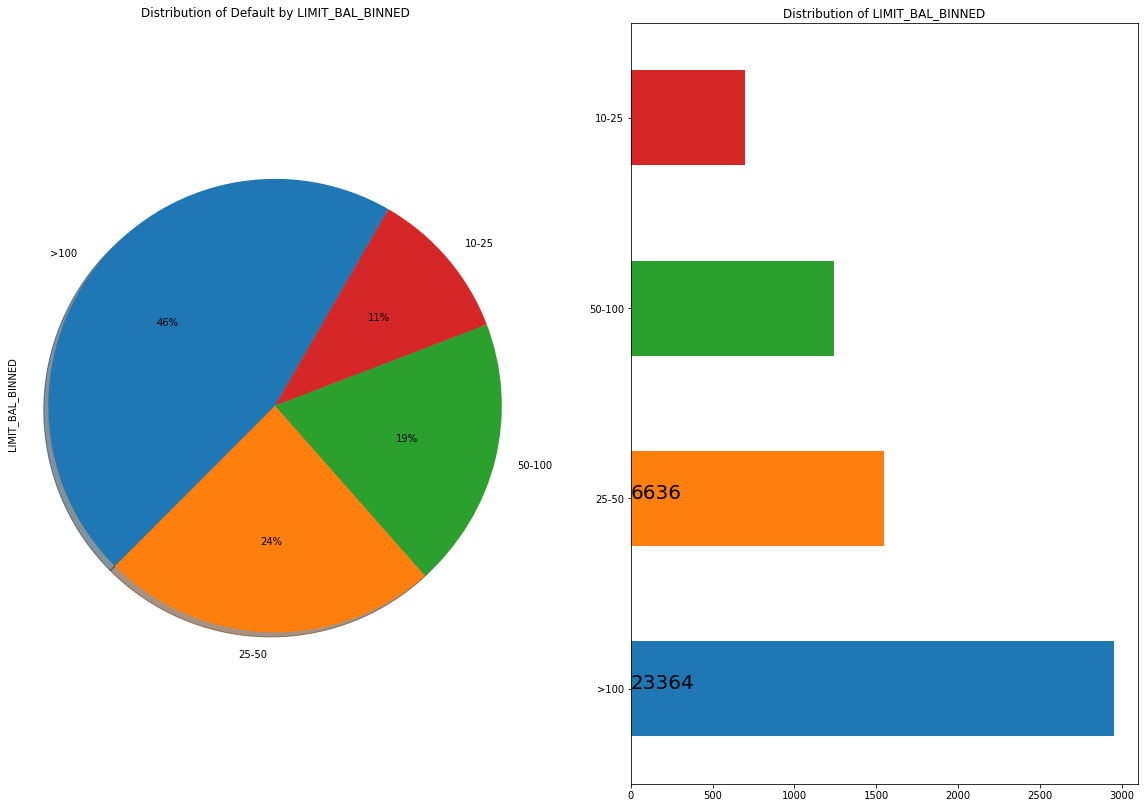

In [23]:
plotCat2("LIMIT_BAL_BINNED")

<a id="sex"></a>
#### Sex/Gender

In [24]:
credit.groupby(['SEX_cat'])["DEFAULTING"].sum()

SEX_cat
1    2873
2    3763
Name: DEFAULTING, dtype: int64

In [25]:
credit.SEX.unique()

array([2, 1])

There are 2 values for Gender/SEX: male and female.

1. Male
2. Female

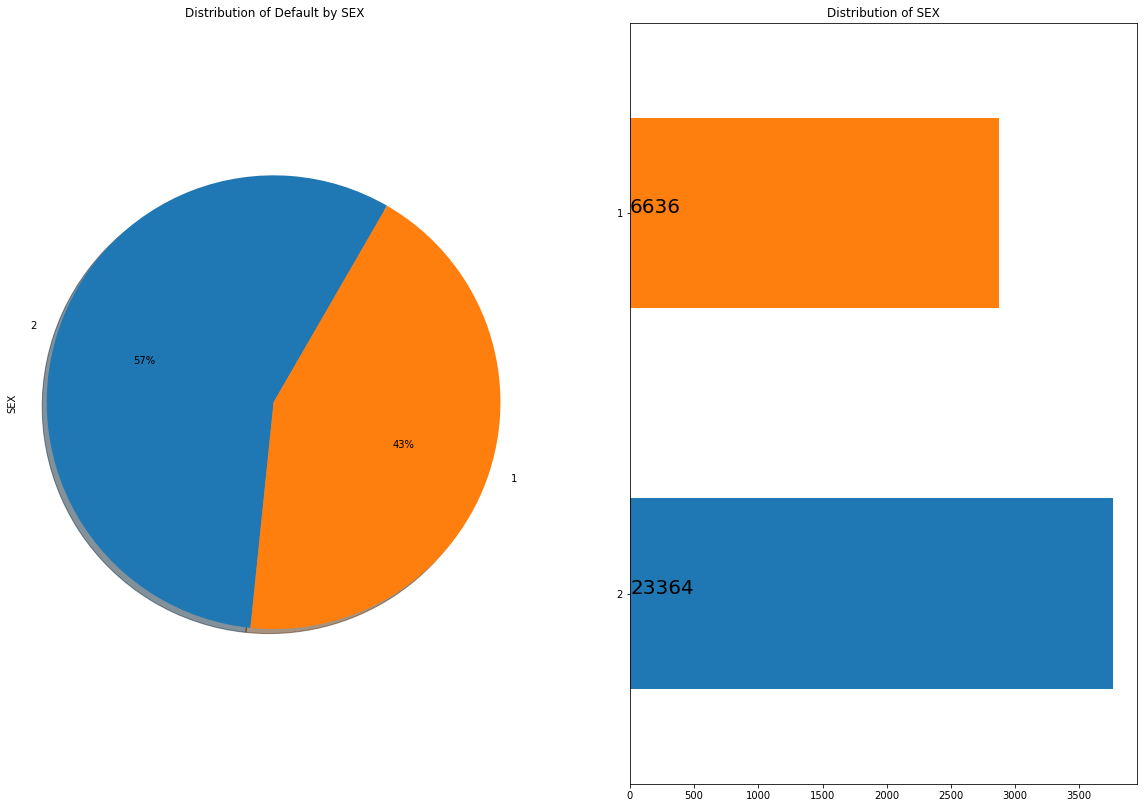

In [26]:
plotCat2("SEX")

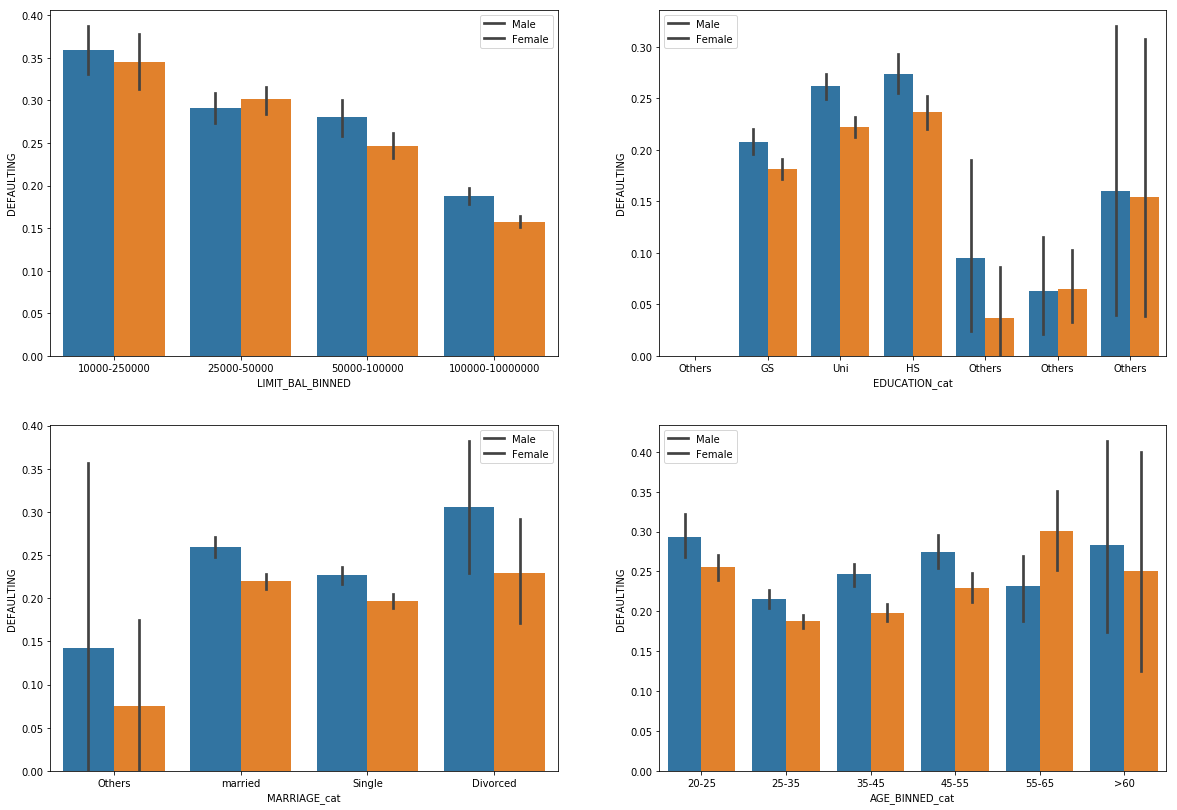

In [27]:
colsx = [ "LIMIT_BAL_BINNED", 'EDUCATION_cat', 'MARRIAGE_cat', 'AGE_BINNED_cat']
length = len(colsx)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")

labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["Others", "GS", "Uni", "HS","Others","Others","Others" ],["Others", "married","Single", "Divorced"],["20-25","25-35","35-45","45-55","55-65",">60"]
]

for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(2,2,j+1)
    pp = sns.barplot(x=i , y="DEFAULTING",hue="SEX", data=credit);
    pp.set_xticklabels(labels[j])
    lgnd = pp.legend(['Male', 'Female'])

plt.show()

    

<a id="Age"></a>
#### Age

In [28]:
credit.groupby(['AGE_BINNED_cat'])["DEFAULTING"].sum()

AGE_BINNED_cat
20-25    1032
25-35    2565
35-45    1861
45-55     954
55-65     201
>60        23
Name: DEFAULTING, dtype: int64

In [29]:
credit.AGE.unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74])

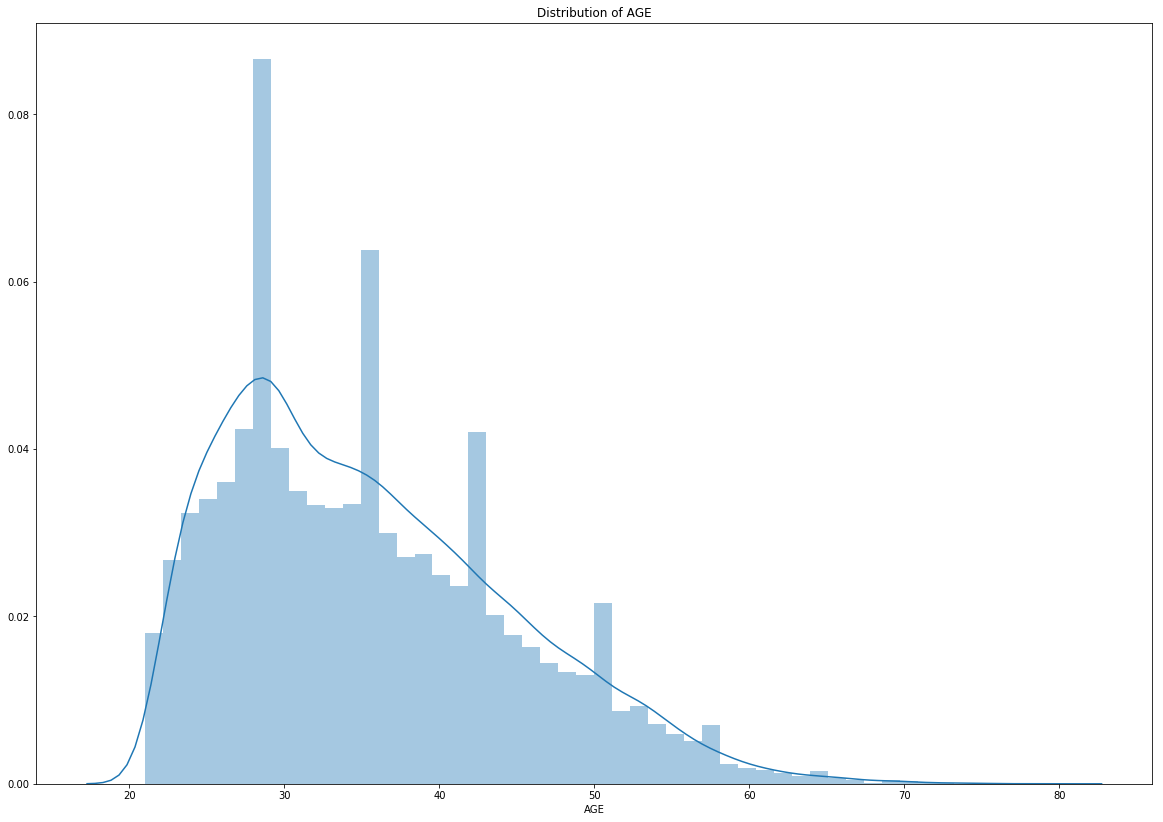

In [30]:
plot_numerical(credit, 'AGE')

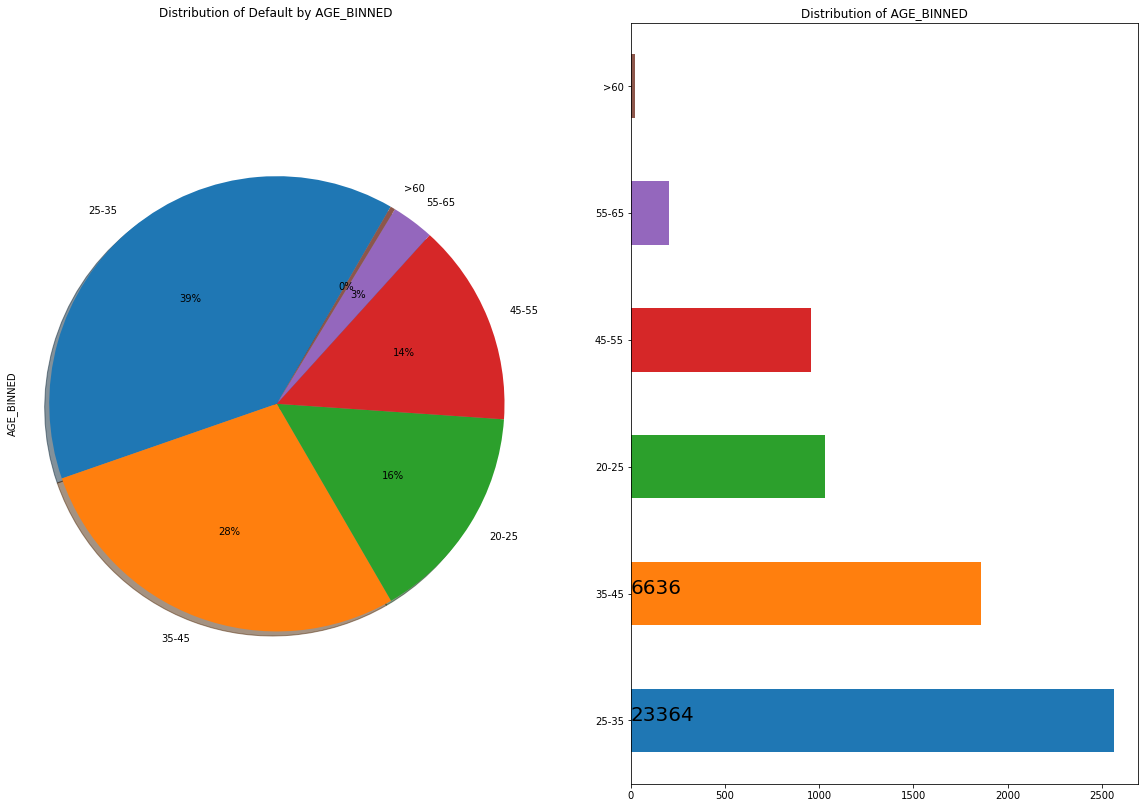

In [31]:
plotCat2("AGE_BINNED")

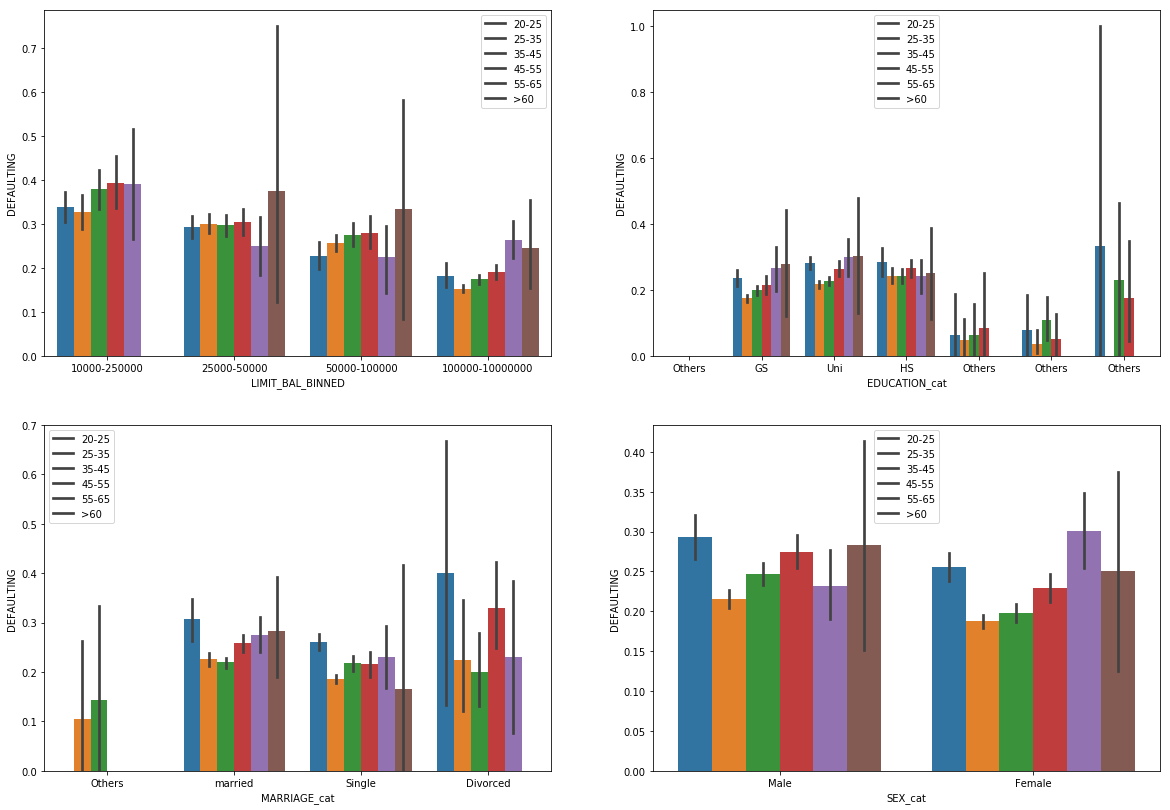

In [32]:
colsx = [ "LIMIT_BAL_BINNED", 'EDUCATION_cat', 'MARRIAGE_cat', 'SEX_cat']
length = len(colsx)
cs = ["r","b","g","k"]


ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")

labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["Others", "GS", "Uni", "HS","Others","Others","Others" ],["Others", "married","Single", "Divorced"], 
    ["Male", "Female"] , ["20-25","25-35","35-45","45-55","55-65",">60"]
]

for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(2,2,j+1)
    pp = sns.barplot(x=i , y="DEFAULTING",hue="AGE_BINNED_cat", data=credit);
    pp.set_xticklabels(labels[j])
    lgnd = pp.legend(["20-25","25-35","35-45","45-55","55-65",">60"])
plt.show()

<a id="MARRIAGE"></a>
#### Marriage

In [57]:
credit.groupby(['MARRIAGE_cat'])["DEFAULTING"].sum()

MARRIAGE_cat
0       5
1    3206
2    3341
3      84
Name: DEFAULTING, dtype: int64

In [34]:
credit["MARRIAGE_cat"].describe()

count     30000
unique        4
top           2
freq      15964
Name: MARRIAGE_cat, dtype: int64

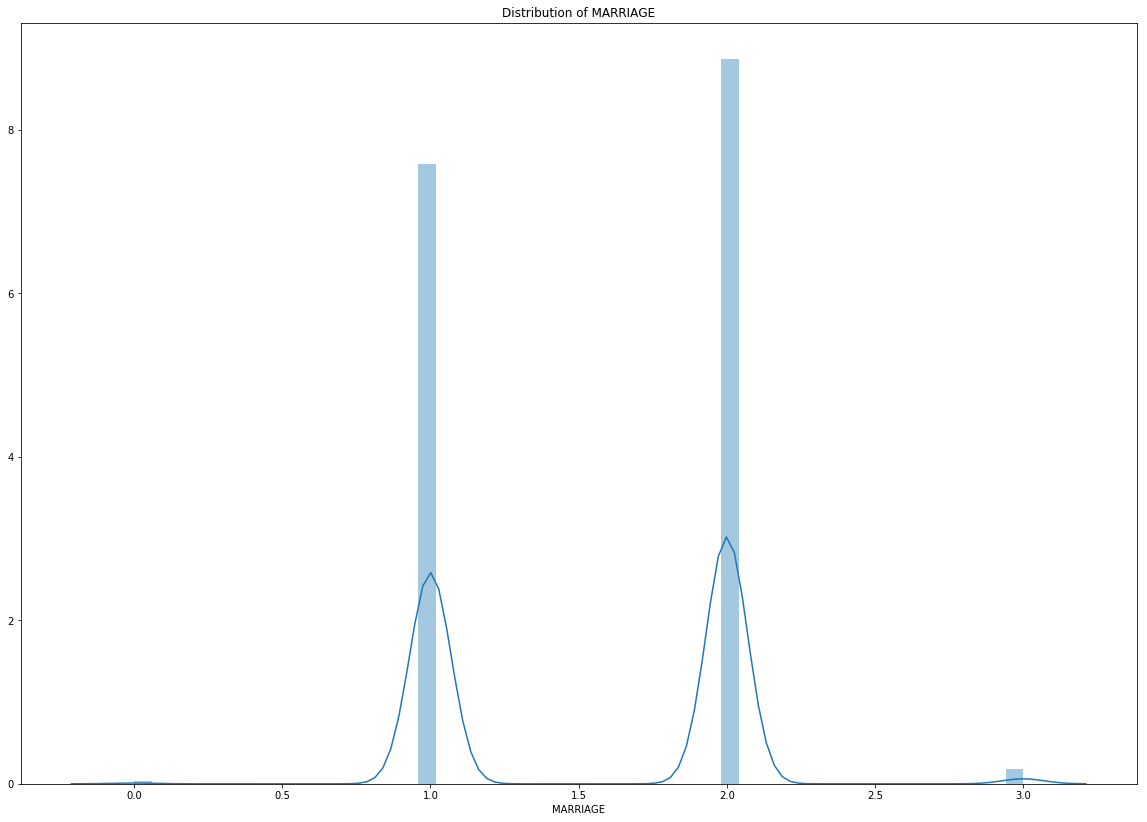

In [35]:
plot_numerical(credit, 'MARRIAGE')

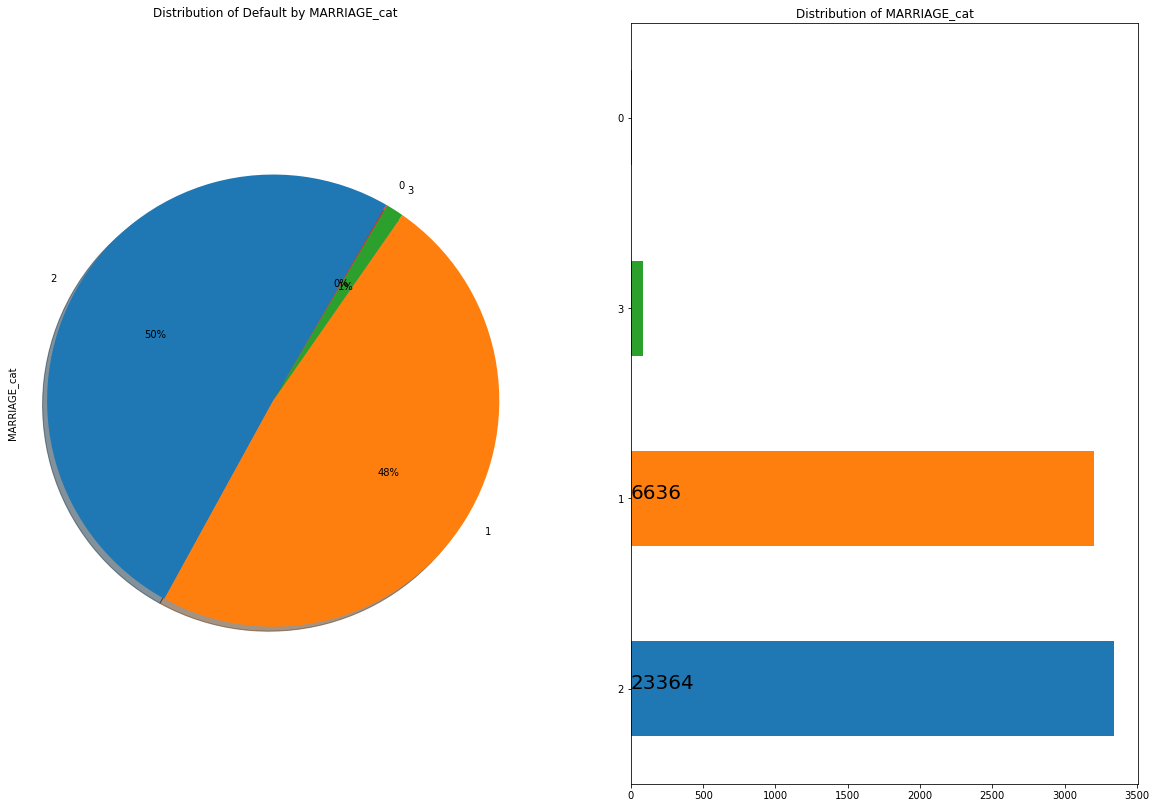

In [36]:
plotCat2('MARRIAGE_cat')

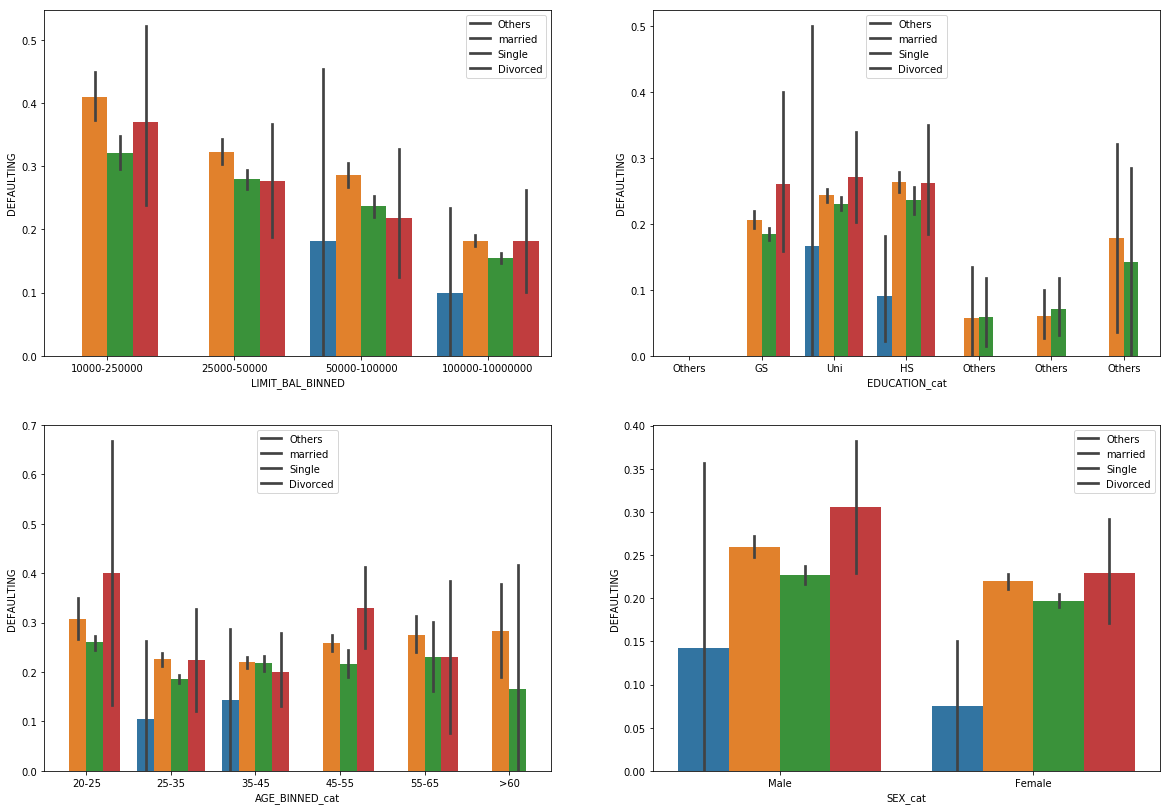

In [37]:
colsx = [ "LIMIT_BAL_BINNED", 'EDUCATION_cat', 'AGE_BINNED_cat', 'SEX_cat']
length = len(colsx)
cs = ["r","b","g","k"]


ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")

labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["Others", "GS", "Uni", "HS","Others","Others","Others" ],["20-25","25-35","35-45","45-55","55-65",">60"],["Male", "Female"]
]

for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(2,2,j+1)
    pp = sns.barplot(x=i , y="DEFAULTING",hue="MARRIAGE_cat", data=credit);
    pp.set_xticklabels(labels[j])
    lgnd = pp.legend(["Others", "married","Single", "Divorced"])

plt.show()


<a id="EDUCATION"></a>
#### Education

In [38]:
credit.groupby(['EDUCATION_cat'])["DEFAULTING"].sum()

EDUCATION_cat
0       0
1    2036
2    3330
3    1237
4       7
5      18
6       8
Name: DEFAULTING, dtype: int64

In [39]:
credit["EDUCATION"].describe()

count    30000.000000
mean         1.853133
std          0.790349
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          6.000000
Name: EDUCATION, dtype: float64

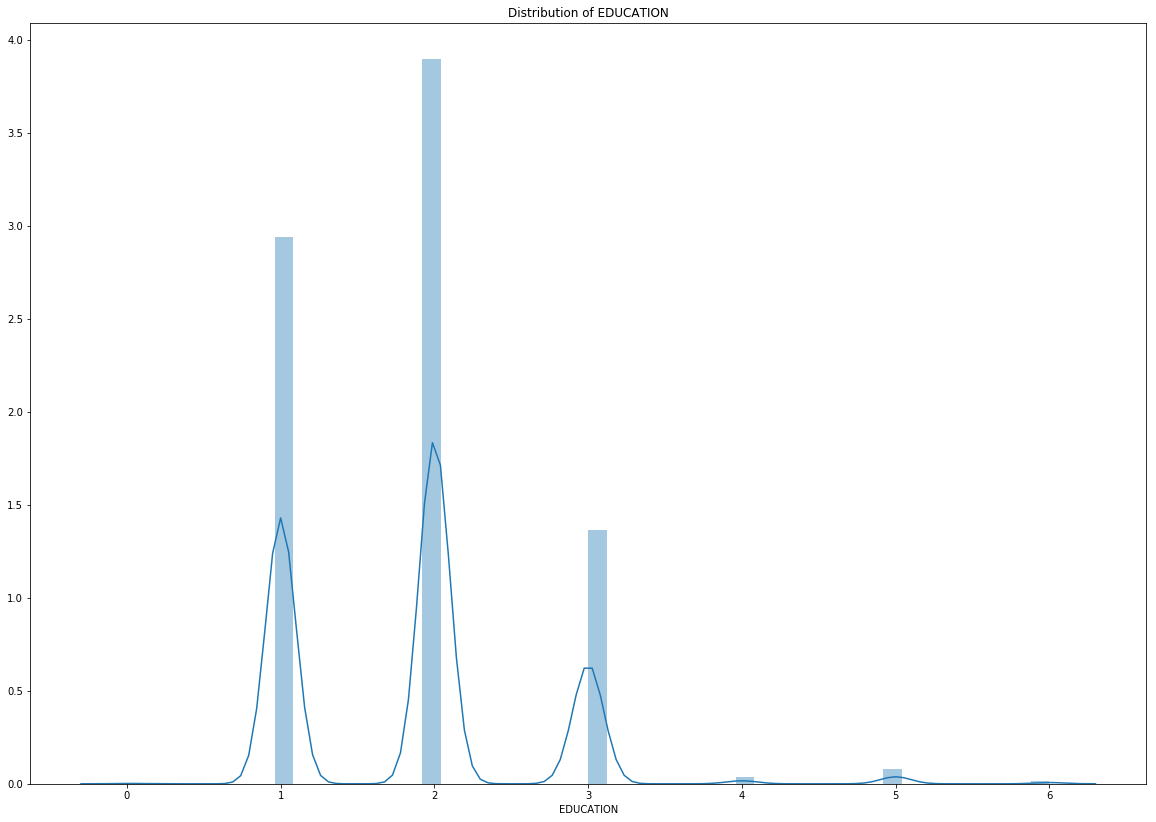

In [40]:
plot_numerical(credit, 'EDUCATION')

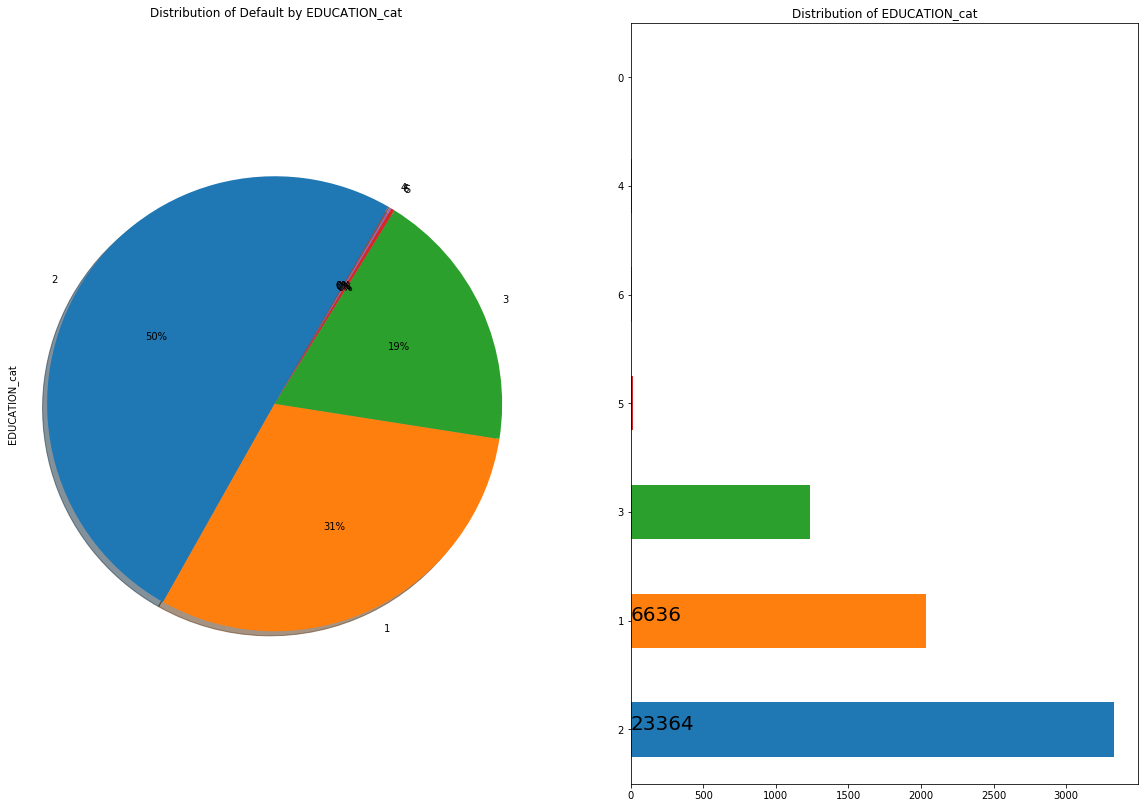

In [41]:
plotCat2("EDUCATION_cat")

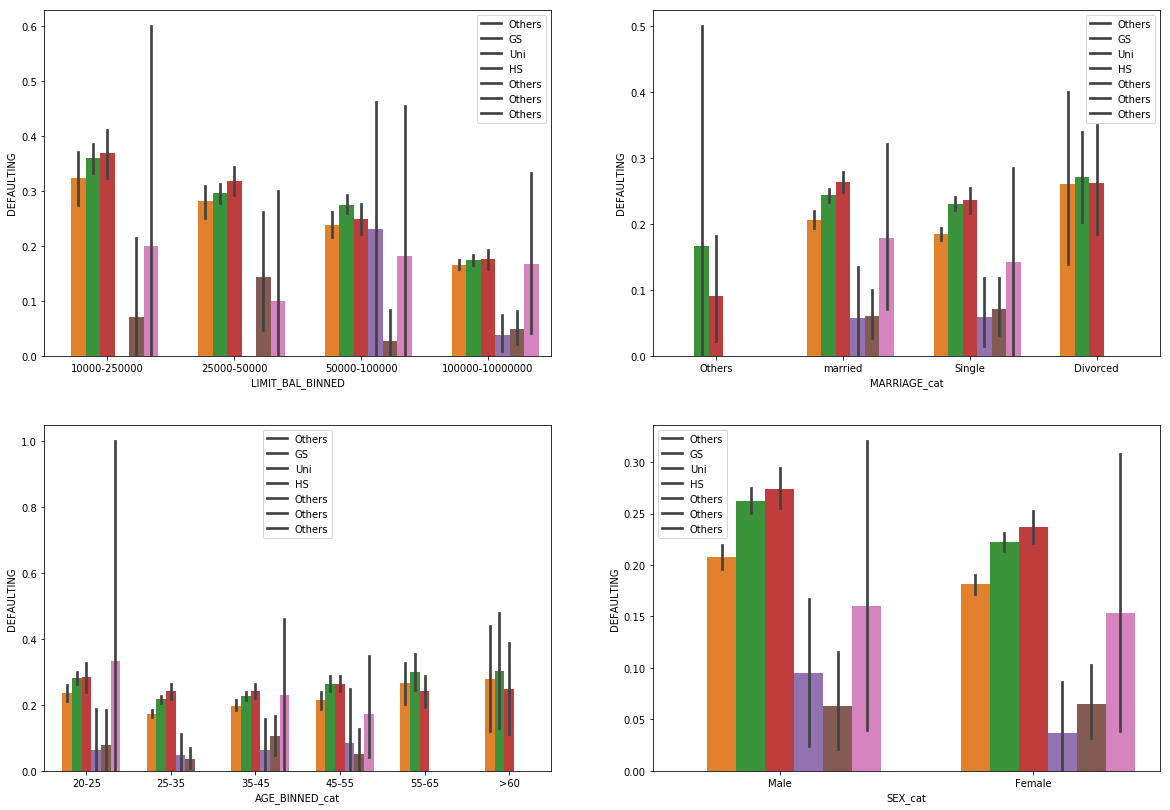

In [42]:
colsx = [ "LIMIT_BAL_BINNED", 'MARRIAGE_cat', 'AGE_BINNED_cat', 'SEX_cat']
length = len(colsx)
cs = ["r","b","g","k"]


ax = plt.figure(figsize=(20,14))
ax.set_facecolor("white")

labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["Others", "married","Single", "Divorced"],["20-25","25-35","35-45","45-55","55-65",">60"], ["Male", "Female"]
]

for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(2,2,j+1) 
    pp = sns.barplot(x=i , y="DEFAULTING",hue="EDUCATION_cat", data=credit);
    pp.set_xticklabels(labels[j])
    lgnd = pp.legend(["Others", "GS", "Uni", "HS","Others","Others","Others" ])

plt.show()


<a id="DEFAULTING"></a>
#### Defaulting Status

In [56]:
credit.groupby(['DEFAULTING'])["DEFAULTING"].sum()

DEFAULTING
0       0
1    6636
Name: DEFAULTING, dtype: int64

In [44]:
credit["DEFAULTING"].describe()

count    30000.000000
mean         0.221200
std          0.415062
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: DEFAULTING, dtype: float64

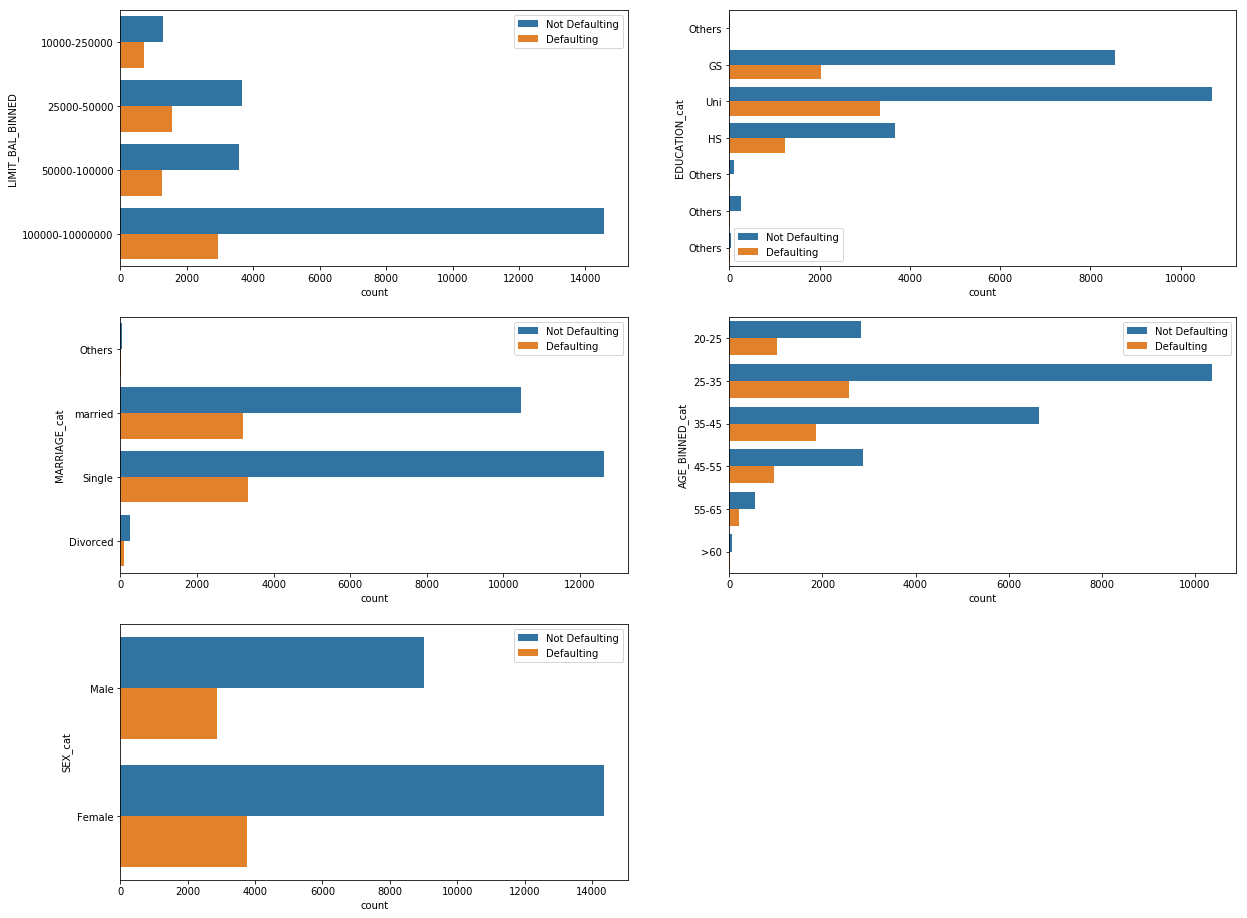

In [58]:
colsx = [ "LIMIT_BAL_BINNED", 'EDUCATION_cat','MARRIAGE_cat', 'AGE_BINNED_cat', 'SEX_cat']
length = len(colsx)
cs = ["r","b","g","k"]


ax = plt.figure(figsize=(20,16))
ax.set_facecolor("white")

labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["Others", "GS", "Uni", "HS","Others","Others","Others" ],["Others", "married","Single", "Divorced"],["20-25","25-35","35-45","45-55","55-65",">60"], ["Male","Female"]
]
for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(3,2,j+1)
#     pp = sns.barplot(x=i , y="DEFAULTING",hue="MARRIAGE_cat", data=credit);
    pp = sns.countplot(y=i , hue="DEFAULTING", data=credit);
    pp.set_yticklabels(labels[j])
    lgnd = pp.legend(['Not Defaulting', 'Defaulting'])
    
plt.show()


<a id="past"></a>
#### History of past payment

## Payment Index

- -2: No consumption; 
- -1: Paid in full; 
- 0: The use of revolving credit; 
- 1 = payment delay for 1 month; 
- 2 = payment delay for 2 months;
- 3 = payment delay for 3 months;
- 4 = payment delay for 4 months;
- 5 = payment delay for 5 months;
- 6 = payment delay for 6 months;
- 7 = payment delay for 7 months;
- 8 = payment delay for 8 months; 
- 9 = payment delay for 9 months and above.

In [89]:
ccc = credit.iloc[:,6:12]

Each colum contains the same data, and we will explore one column.

In [ ]:
credit["PAY_0"].unique()

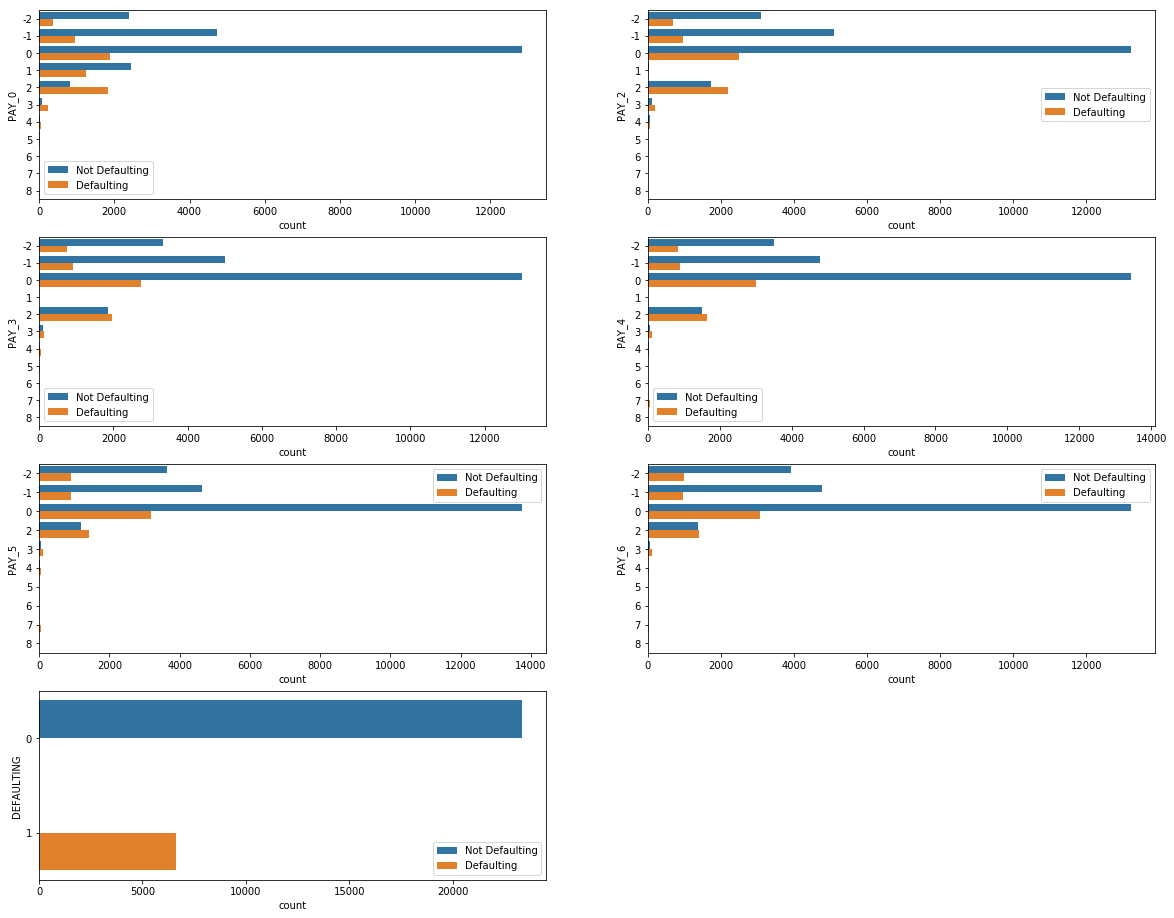

In [95]:
colsx = [ "PAY_0",	"PAY_2",	"PAY_3"	, "PAY_4" ,	"PAY_5" ,"PAY_6", "DEFAULTING"]


ax = plt.figure(figsize=(20,16))
ax.set_facecolor("white")

labels = [
    ["10000-250000","25000-50000","50000-100000", "100000-10000000"],["Others", "GS", "Uni", "HS","Others","Others","Others" ],["Others", "married","Single", "Divorced"],["20-25","25-35","35-45","45-55","55-65",">60"], ["Male","Female"]
]

tempMat = pd.concat([ccc, credit["DEFAULTING"]], axis=1)

tempMat

length = len(colsx)
cs = ["r","b","g","k"]

for i,j in itertools.zip_longest(colsx,range(length)):
    plt.subplot(4,2,j+1)
#     pp = sns.barplot(x=i , y="DEFAULTING",hue="MARRIAGE_cat", data=credit);
    pp = sns.countplot(y=i , hue="DEFAULTING", data=credit);
#     pp.set_yticklabels(labels[j])
    lgnd = pp.legend(['Not Defaulting', 'Defaulting'])
    
plt.show()

<a id="bill"></a>
#### Amount of bill statement

In [ ]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

<a id="Amount of previous payment"></a>
#### Amount of previous payment

# Load data

# Prepare User Data


# Output Results

In [ ]:
# usersusers..to_csvto_csv(('data/2017/users.csv''data/20 , index=False)
# repos_users.to_csv('data/2017/repos-users-geocodes.csv', index=False)
# repos_users.to_csv('data/2017/repos-users.csv', index=False)

<a id="References"></a>
# References
___

1. https://www.kaggle.com/pavanraj159/loan-repayers-v-s-loan-defaulters-home-credit
2. https://www.kaggle.com/harunshimanto/introduction-home-credit-default-risk
